Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Taxi"

In [336]:
import numpy as np
import random
from taxi_env_extended import TaxiEnvExtended

In [337]:
env = TaxiEnvExtended()

Obtener la cantidad de estados y acciones

In [338]:
actions = env.action_space.n
states = env.observation_space.n

Inicialización de la tabla Q

In [339]:
Q = np.zeros((states, actions))
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Obtención de la acción a partir de la tabla Q

In [340]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

Epsilon-Greedy Policy

In [341]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()\
    
    else: # exploit
        action = np.argmax(Q[state])\
        
    return action

Ejemplo de episodio 

In [342]:
obs,_ = env.reset()
print(obs)
done = False
total_reward = 0
step_count = 0
while not done:
    state = obs
    action = epsilon_greedy_policy(state, Q, 0.5)
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    step_count += 1
    print('->', state, action, reward, obs, done)
    env.render()
print('total_reward', total_reward)
print('total_steps', step_count)

464
-> 464 0 -1 464 False
-> 464 3 -1 464 False
-> 464 5 -10 464 False
-> 464 0 -1 464 False
-> 464 0 -1 464 False
-> 464 2 -1 484 False
-> 484 0 -1 484 False
-> 484 0 -1 484 False
-> 484 1 -1 384 False
-> 384 0 -1 484 False
-> 484 0 -1 484 False
-> 484 0 -1 484 False
-> 484 0 -1 484 False
-> 484 0 -1 484 False
-> 484 0 -1 484 False
-> 484 3 -1 464 False
-> 464 4 -10 464 False
-> 464 0 -1 464 False
-> 464 0 -1 464 False
-> 464 2 -1 484 False
-> 484 0 -1 484 False
-> 484 1 -1 384 False
-> 384 4 -10 384 False
-> 384 0 -1 484 False
-> 484 0 -1 484 False
-> 484 0 -1 484 False
-> 484 2 -1 484 False
-> 484 0 -1 484 False
-> 484 4 -10 484 False
-> 484 2 -1 484 False
-> 484 0 -1 484 False
-> 484 3 -1 464 False
-> 464 1 -1 364 False
-> 364 0 -1 464 False
-> 464 0 -1 464 False
-> 464 0 -1 464 False
-> 464 0 -1 464 False
-> 464 0 -1 464 False
-> 464 0 -1 464 False
-> 464 2 -1 484 False
-> 484 2 -1 484 False
-> 484 0 -1 484 False
-> 484 4 -10 484 False
-> 484 5 -10 484 False
-> 484 0 -1 484 False


Generar muchos episodios

In [343]:
max_steps = env.max_steps
max_steps

200

In [344]:
episodes = 80000

In [345]:
alpha=1 / (max_steps+1)
alpha

0.004975124378109453

In [346]:
gamma = 0.9

In [347]:
epsilon =0.99

In [348]:
rewards=[]
steps=[]

In [349]:
from tqdm import tqdm

In [350]:
i = 0
success = 0
for i in tqdm(range(episodes)):
    
    total_reward = 0    
    step_count = 0
    obs, _ = env.reset()
    done=False
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, done, _, _ = env.step(action)
        
        total_reward += reward
        step_count += 1
        if (reward ==20):
            success+=1
                      
        value = Q[state][action] + alpha*(reward + gamma*np.max(Q[obs]) - Q[state][action])
        Q[state][action] = value
    
    rewards.append(total_reward)
    steps.append(step_count)
    i=i+1
    if (i %  4== 0) and (epsilon > 0.01):  
        epsilon *= 0.99
print(success)


100%|██████████| 80000/80000 [01:07<00:00, 1182.51it/s]

76950


In [351]:
epsilon

0.009920974201040588

In [352]:
print(success/episodes*100, '%')

96.1875 %


In [353]:
import matplotlib.pyplot as plt


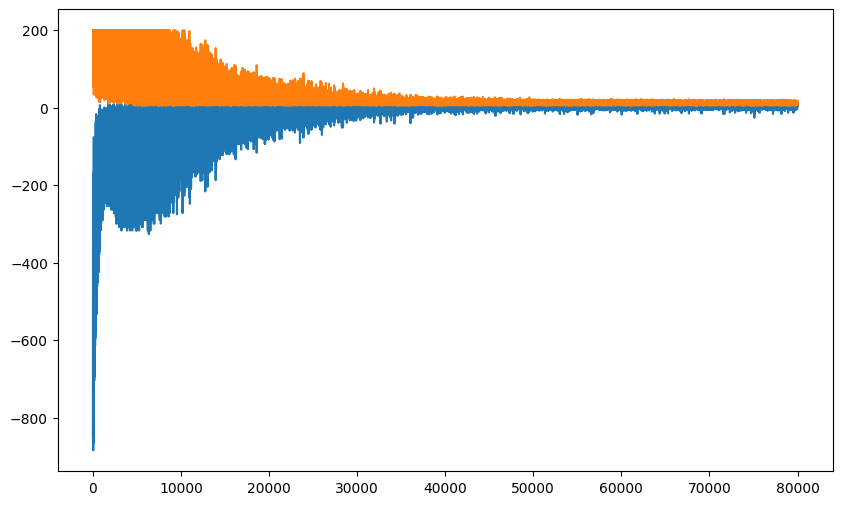

In [354]:
plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.plot(steps)

plt.show()

In [355]:
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.98897872, -2.80914317, -3.03251901, -2.89608562,  1.62261467,
        -3.29570308],
       [-1.29238517, -1.22248466, -1.57864618, -1.29526382,  7.7147    ,
        -1.77962465],
       ...,
       [-0.80185693, -0.71135503, -0.8012728 , -0.80394396, -0.86348981,
        -0.82126807],
       [-2.15560728, -2.15399189, -2.15551893, -2.02833776, -2.17428732,
        -2.17097113],
       [-0.02976918, -0.02491725, -0.02979483,  2.4540726 , -0.14851815,
        -0.34332423]])

In [356]:
policy=[]
for i in tqdm(range(states)):
    best_action = np.argmax(Q[i])
    policy.append(best_action)

print(policy)

100%|██████████| 500/500 [00:00<00:00, 246347.00it/s]

[0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 4, 0, 4, 4, 0, 3, 0, 3, 3, 3, 0, 0, 3, 5, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 1, 0, 1, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 3, 3, 3, 1, 0, 2, 1, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 3, 3, 3, 1, 0, 1, 1, 3, 3, 0, 3, 0, 0, 0, 0, 3, 2, 3, 0, 0, 3, 3, 3, 1, 0, 1, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 

In [357]:
rewards_testing=[]
steps_testing=[]

In [358]:
i = 0
while i< 20:
    print("episode:", i+1)
    obs,_ = env.reset()
    done = False
    total_reward = 0
    step_count = 0
    while not done:
        state = obs
        action = policy[state]
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        step_count += 1
        env.render()
    i+=1
    rewards_testing.append(total_reward)
    steps_testing.append(step_count)
    print('-> total reward: ', total_reward)
    print('-> total steps: ', step_count)

episode: 1
-> total reward:  10
-> total steps:  11
episode: 2
-> total reward:  10
-> total steps:  11
episode: 3
-> total reward:  4
-> total steps:  17
episode: 4
-> total reward:  5
-> total steps:  16
episode: 5
-> total reward:  8
-> total steps:  13
episode: 6
-> total reward:  11
-> total steps:  10
episode: 7
-> total reward:  8
-> total steps:  13
episode: 8
-> total reward:  8
-> total steps:  13
episode: 9
-> total reward:  8
-> total steps:  13
episode: 10
-> total reward:  13
-> total steps:  8
episode: 11
-> total reward:  6
-> total steps:  15
episode: 12
-> total reward:  13
-> total steps:  8
episode: 13
-> total reward:  10
-> total steps:  11
episode: 14
-> total reward:  9
-> total steps:  12
episode: 15
-> total reward:  10
-> total steps:  11
episode: 16
-> total reward:  7
-> total steps:  14
episode: 17
-> total reward:  9
-> total steps:  12
episode: 18
-> total reward:  9
-> total steps:  12
episode: 19
-> total reward:  5
-> total steps:  16
episode: 20
-> t

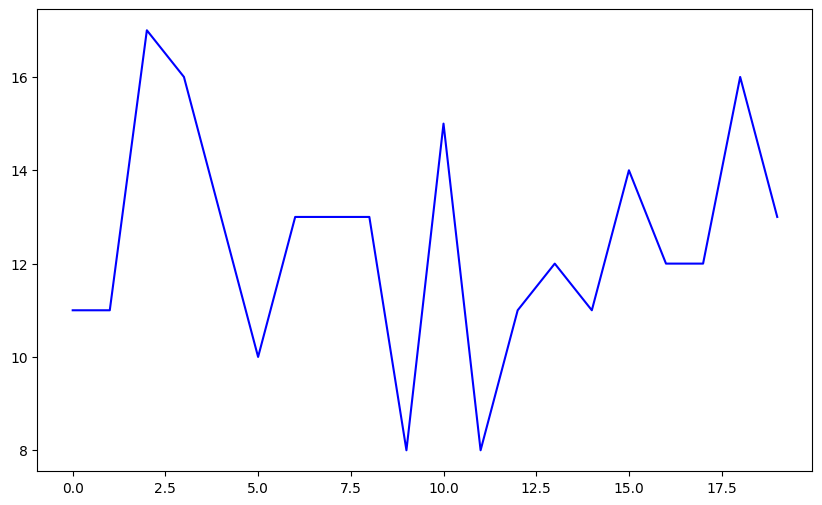

In [359]:
# Plot steps
plt.figure(figsize=(10, 6))
plt.plot(steps_testing, color='blue', label='Episode steps')

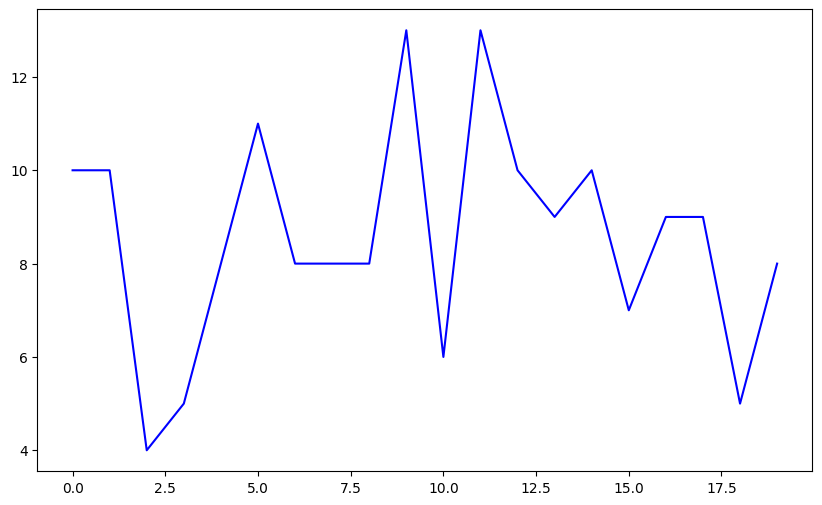

In [360]:
# Plot rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards_testing, color='blue', label='Episode steps')

In [361]:
average_steps = np.mean(steps_testing)
print("average steps: ", average_steps)
average_rewards = np.mean(rewards_testing)
print("Average rewards: ", average_rewards)

average steps:  12.45
Average rewards:  8.55


In [362]:
obs,_ = env.reset()
done = False
rewards = []
total_reward = 0
step_count = 0
while not done:
    state = obs
    action = policy[state]
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    step_count += 1
    
    rewards.append(total_reward)
    env.render()
i+=1
print('-> total reward: ', rewards)
print('-> total steps: ', step_count)

-> total reward:  [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, 8]
-> total steps:  13


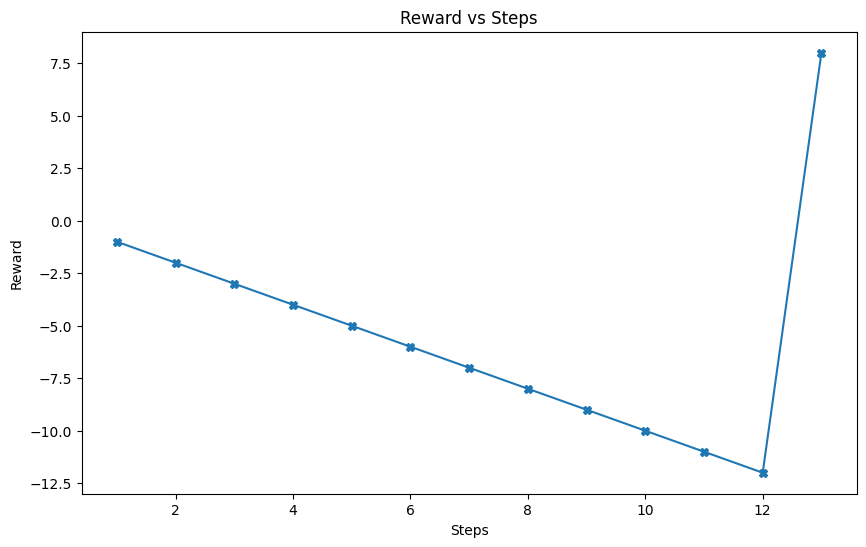

In [363]:
shifted_steps = [step + 1 for step in range(step_count)]

# Plot rewards vs steps
plt.figure(figsize=(10, 6))
plt.plot(shifted_steps, rewards, marker='X')  # Use 'X' for markers
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward vs Steps')
plt.show()